# Project: Investigate a Dataset (Medical Appointment No Shows)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment depending on some features as gender,age, neighbourhood, people with hipertension, diabetes, alcoholism, handcap and we will pose some questions to know how the above features affect the showing up of patients.
>>The questions we will pose:
* Is there any relationship between patients' gender and their showing up?
* Does SMS receiving affect showing up of patients?
* Does age affect showing up of patients?
* Do people with chronic diesease show up less than healthy people?

   

In [109]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

### We import the data and found that we have 14 features 

In [110]:
df=pd.read_csv('NoShowUp2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [111]:
df.shape

(110527, 14)

### We are checking for any null or duplicated value in our data

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [113]:
df.isnull().any().any()

False

In [114]:
sum(df.duplicated())

0

> Great we don't have any null or duplicated value

### The feature PatientID and AppointmentID that are not necessary for our analysis; so we will drop them

In [115]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [116]:
# To make sure of droping the two columns
df.head(1)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [117]:
df.shape

(110527, 12)

### We will get a look at values in each feature we are seeking to analyze them

In [118]:
# Feature 'Age'
df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

> We found one value in age feature have -1 and age can't be negative; so we will drop it

In [119]:
# We will drop this row
df=df[df['Age']>=0]

In [120]:
# To confirm that we drop it
df.Age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

In [121]:
df.shape

(110526, 12)

In [122]:
# Feature 'Handcap'
df.Handcap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

> As we know from dataset documentation that Handcap value is 1 or 0; so we will drop the rows with values 2,3,4

In [123]:
df=df[df['Handcap']<=1]

In [124]:
# To confirm the change
df.Handcap.value_counts()

0    108285
1      2042
Name: Handcap, dtype: int64

In [125]:
df.shape

(110327, 12)

In [126]:
# Feature 'Hipertension'
df.Hipertension.value_counts()

0    88611
1    21716
Name: Hipertension, dtype: int64

In [127]:
# Feature 'Diabetes'
df.Diabetes.value_counts()

0    102427
1      7900
Name: Diabetes, dtype: int64

In [128]:
# Feature 'Scholarship'
df.Scholarship.value_counts()

0    99484
1    10843
Name: Scholarship, dtype: int64

In [129]:
# Feature 'Alcoholism'
df.Alcoholism.value_counts()

0    106975
1      3352
Name: Alcoholism, dtype: int64

In [130]:
# Feature 'SMS_received'
df.SMS_received.value_counts()

0    74892
1    35435
Name: SMS_received, dtype: int64

In [131]:
# Feature 'Gender'
df['Gender'].value_counts()

F    71730
M    38597
Name: Gender, dtype: int64

In [132]:
# Feature 'No-show'
df['No-show'].value_counts()

No     88049
Yes    22278
Name: No-show, dtype: int64

>> So we now confirm that all features are ready to be used with no further cleaning 

In [133]:
def plot( x1,  x2,  x3,  x4,  x5):
    sns.countplot(x=x1,hue=x2,palette=[x3, x4]);
    plt.title(x5);

<a id='eda'></a>
## Exploratory Data Analysis

### Is there any relationship between patients' gender and their showing up?

In [134]:
df['Gender'].value_counts()

F    71730
M    38597
Name: Gender, dtype: int64

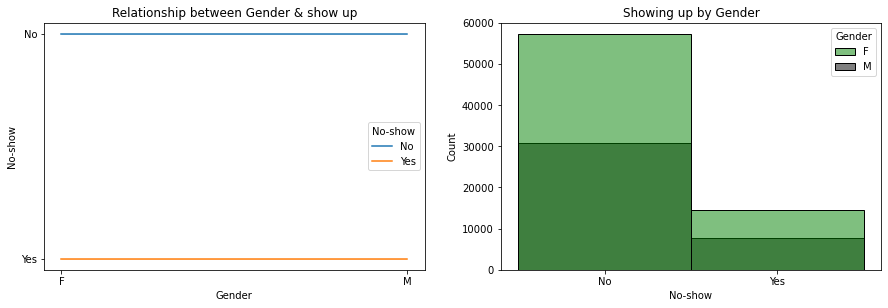

In [135]:
plt.figure(figsize=(15,10));
plt.subplot(2,2,1)
sns.lineplot(data=df, x="Gender", y="No-show",hue="No-show");
plt.title('Relationship between Gender & show up');
plt.subplot(2,2,2)
sns.histplot(x=df['No-show'],hue=df['Gender'],palette=["green", "black"]);
plt.title('Showing up by Gender');

> * The number of females' show up is greater than the males. It's expected as the data for females more than males. It's an indecation that females visit clinic 
> * I want to show the relation between gender and showing up but as they are bool values so the relation between showing up and gender is clearly posed in histogram

### Does SMS receiving affect showing up of patients?

In [136]:
df.SMS_received.value_counts()

0    74892
1    35435
Name: SMS_received, dtype: int64

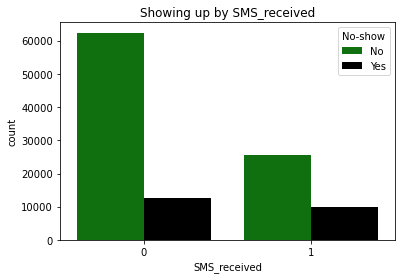

In [137]:
#import seaborn as sns
plot(df['SMS_received'],df['No-show'],"green","black",'Showing up by SMS_received')


> We found that the feature of receiving SMS doesn't affect the showing up strongly; so we recommend that the clinic give their clients the choice of getting SMS on their appointment. At the end of every month, we recommend analyzing showing up VS receiving SMS  to double-check if their clients still interested in this service or not 

### Does age affect showing up of patients?

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

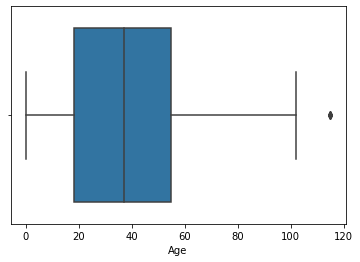

In [138]:
sns.boxplot(df['Age'])

> We found that most of our patients age between 15 to 60 years old

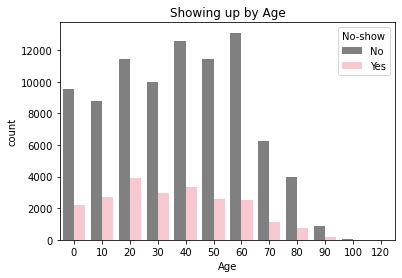

In [139]:
df['Age'] = [round(a,-1) for a in df['Age']] 
plot(df['Age'],df['No-show'],"gray", "pink",'Showing up by Age')

> We found that not showing up increases by the elder or younger ages than 20

### Do people with chronic diesease show up less than healthy people?

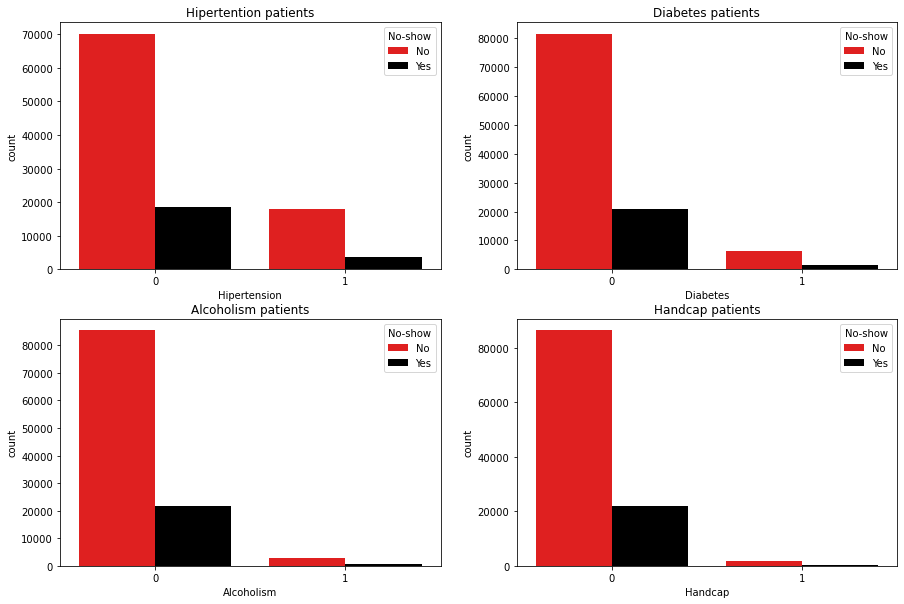

In [140]:
plt.figure(figsize=(15,10));
plt.subplot(2,2,1)
plot(df['Hipertension'],df['No-show'],"red", "black",'Hipertention patients')
plt.subplot(2,2,2)
plot(df['Diabetes'],df['No-show'],"red", "black",'Diabetes patients')
plt.subplot(2,2,3)
plot(df['Alcoholism'],df['No-show'],"red", "black",'Alcoholism patients')
plt.subplot(2,2,4)
plot(df['Handcap'],df['No-show'],"red", "black",'Handcap patients')

> We found that people with hipertension show up more comparing to people with other chronic diseases. almost healty people don't show up more than people with chronic diesease 

<a id='conclusions'></a>
## Conclusions
* To sum it up:
>> We found that gender and age are the most important factors. Sending SMS to patients affects showing up patients slightly. Healthy people are showing up less than people who have a chronic disease.
* Limitations:
>>the notebook on udacity was not up to date to use some function of seaborn. The data for females was greater than males. Most of our features are with probability 0,1 only, so visualization to show relations among features is hard & histogram is the best way, but it makes my communication have kind of repetitiveness 